In [219]:
import pandas as pd
import calendar
import numpy as np
from datetime import date
import matplotlib.pyplot as plt

In [221]:
wego = pd.read_csv("../data/Route 50 Timepoint and Headway Data, 1-1-2023 through 5-12-2025.csv")

In [222]:
wego_day_of_week = wego.copy()

In [223]:
print(wego_day_of_week.columns)

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'BLOCK_STOP_ORDER',
       'DWELL_IN_MINS'],
      dtype='object')


In [227]:
wego_day_of_week['TIME_OF_DAY_CATEGORY']=pd.cut(wego_day_of_week['SCHEDULED_TIME'],bins=['05:00:00','08:00:00','11:00:00','14:00:00','17:00:00','20:00:00','24:00:00'],include_lowest=True,labels=['EM','MP','MD','AP','EP','LN'])

In [229]:
wego_day_of_week['DATE']= pd.to_datetime(wego_day_of_week['DATE'])

In [231]:
wego_day_of_week['DAY_NUM'] = wego_day_of_week['DATE'].dt.weekday

In [233]:
wego_sunday = wego_day_of_week[wego_day_of_week['DAY_NUM']==6]

In [235]:
wego_monday = wego_day_of_week[wego_day_of_week['DAY_NUM']==0]

In [237]:
wego_tuesday = wego_day_of_week[wego_day_of_week['DAY_NUM']==1]

In [239]:
wego_wednesday =  wego_day_of_week[wego_day_of_week['DAY_NUM']==2]

In [241]:
wego_thursday =  wego_day_of_week[wego_day_of_week['DAY_NUM']==3]

In [243]:
wego_friday = wego_day_of_week[wego_day_of_week['DAY_NUM']==4]

In [245]:
wego_saturday = wego_day_of_week[wego_day_of_week['DAY_NUM']==5]

In [247]:
wego_weekdays = wego_day_of_week[wego_day_of_week['DAY_NUM'] < 6]

In [249]:
wego_weekends = wego_day_of_week[wego_day_of_week['DAY_NUM'] > 5]

In [251]:
wego_copy = wego_day_of_week.copy()

In [253]:
wego_adherence = wego_copy[['ADHERENCE']]

In [255]:
adherence_late = wego_adherence[wego_adherence['ADHERENCE']< -6]

In [257]:
adherence_early = wego_adherence[wego_adherence['ADHERENCE']> 1]

In [259]:
tsp_one_chunk = wego_day_of_week[wego_day_of_week['DATE'].between('2025/2/4','2025/2/9')]
tsp_one_first_day=wego_day_of_week[wego_day_of_week['DATE']=='2025/2/3']
tsp_one_time = tsp_one_first_day[tsp_one_first_day['ACTUAL_ARRIVAL_TIME']>'12:00:00']
tsp_one_last_day=wego_day_of_week[wego_day_of_week['DATE']=='2025/2/10']
tsp_last_time = tsp_one_last_day[tsp_one_last_day['ACTUAL_ARRIVAL_TIME']<'12:00:00']
tsp_one_complete = pd.concat([tsp_one_first_day, tsp_one_chunk,tsp_one_last_day])

In [261]:
tscpb_chunk = wego_day_of_week[wego_day_of_week['DATE'].between('2025/2/11','2025/4/27')]
tscpb_first_day=wego_day_of_week[wego_day_of_week['DATE']=='2025/2/10']
tscpb_first_time = tscpb_first_day[tscpb_first_day['ACTUAL_ARRIVAL_TIME']>'12:00:00']
tscpb_last_day=wego_day_of_week[wego_day_of_week['DATE']=='2025/4/28']
tscpb_last_time = tscpb_last_day[tscpb_last_day['ACTUAL_ARRIVAL_TIME']<'12:00:00']
tscpb_complete = pd.concat([tscpb_first_time, tscpb_chunk, tscpb_last_time])

In [263]:
tsp_off_chunk = wego_day_of_week[wego_day_of_week['DATE'].between('2025/4/29','2025/5/4')]
tsp_off_first_day = wego_day_of_week[wego_day_of_week['DATE']=='2025/4/28']
tsp_off_first_time = tsp_off_first_day[tsp_off_first_day['ACTUAL_ARRIVAL_TIME']>'12:00:00']
tsp_off_last_day = wego_day_of_week[wego_day_of_week['DATE']=='2025/5/5']
tsp_off_last_time = tsp_off_last_day[tsp_off_last_day['ACTUAL_ARRIVAL_TIME']<'12:00:00']
tsp_off_complete = pd.concat([tsp_off_first_time,tsp_off_chunk,tsp_off_last_time])

In [265]:
tsp_two_chunk = wego_day_of_week[wego_day_of_week['DATE'].between('2025/5/6','2025/5/11')]
tsp_two_first_day = wego_day_of_week[wego_day_of_week['DATE']=='2025/5/5']
tsp_two_first_time = tsp_two_first_day[tsp_two_first_day['ACTUAL_ARRIVAL_TIME']>'12:00:00']
tsp_two_last_day = wego_day_of_week[wego_day_of_week['DATE']=='2025/5/12']
tsp_two_last_time = tsp_two_last_day[tsp_two_last_day['ACTUAL_ARRIVAL_TIME']<'12:00:00']
tsp_two_complete = pd.concat ([tsp_two_first_time, tsp_two_chunk, tsp_two_last_time])

In [267]:
tsphc_chunk = wego_day_of_week[wego_day_of_week['DATE']>('2025/5/12')]
tsphc_first_day = wego_day_of_week[wego_day_of_week['DATE']=='2025/5/12']
tsphc_first_time = tsphc_first_day[tsphc_first_day['ACTUAL_ARRIVAL_TIME']>'12:00:00']
tsphc_complete = pd.concat ([tsphc_first_time, tsphc_chunk])

In [269]:
wego_drivers = wego_copy[['OPERATOR','DATE']]

In [271]:
wego_drivers_count = wego_drivers['OPERATOR'].nunique()

In [273]:
driver_stop_count = wego_drivers.groupby(('OPERATOR'), as_index=False).count()

In [275]:
driver_stop_count['DATE'].mean()

1308.6638477801268

In [277]:
top_half_drivers = driver_stop_count[driver_stop_count['DATE']>1308]

In [279]:
bottom_half_drivers = driver_stop_count[driver_stop_count['DATE']<1308]

In [281]:
top_half_driver_ids = top_half_drivers['OPERATOR'].tolist()

In [283]:
bottom_half_driver_ids = bottom_half_drivers['OPERATOR'].tolist()

In [285]:
top_tscpb = tscpb_complete[tscpb_complete['OPERATOR'].isin(top_half_driver_ids)]

In [287]:
bottom_tscpb = tscpb_complete[tscpb_complete['OPERATOR'].isin(bottom_half_driver_ids)]

In [289]:
top_tsp_off = tsp_off_complete[tsp_off_complete['OPERATOR'].isin(top_half_driver_ids)]

In [291]:
bottom_tsp_off = tsp_off_complete[tsp_off_complete['OPERATOR'].isin(bottom_half_driver_ids)]

In [293]:
top_tsp_one = tsp_one_complete[tsp_one_complete['OPERATOR'].isin(top_half_driver_ids)]

In [295]:
bottom_tsp_one = tsp_one_complete[tsp_one_complete['OPERATOR'].isin(bottom_half_driver_ids)]

In [297]:
top_tsp_two = tsp_two_complete[tsp_two_complete['OPERATOR'].isin(top_half_driver_ids)]

In [299]:
bottom_tsp_two = tsp_two_complete[tsp_two_complete['OPERATOR'].isin(bottom_half_driver_ids)]

In [301]:
top_tsphc = tsphc_complete[tsphc_complete['OPERATOR'].isin(top_half_driver_ids)]

In [303]:
bottom_tsphc = tsphc_complete[tsphc_complete['OPERATOR'].isin(bottom_half_driver_ids)]

In [305]:
top_tsp_off_adherence = top_tsp_off['ADHERENCE'].mean()
bottom_tsp_off_adherence = bottom_tsp_off['ADHERENCE'].mean()

In [307]:
top_tscpb_adherence = top_tscpb['ADHERENCE'].mean()
bottom_tscpb_adherence = bottom_tscpb['ADHERENCE'].mean()

In [309]:
top_tsp_one_adherence = top_tsp_one['ADHERENCE'].mean()
bottom_tsp_one_adherence = bottom_tsp_one['ADHERENCE'].mean()

In [311]:
top_tsp_two_adherence = top_tsp_two['ADHERENCE'].mean()
bottom_tsp_two_adherence = bottom_tsp_two['ADHERENCE'].mean()

In [313]:
top_tsphc_adherence = top_tsphc['ADHERENCE'].mean()
bottom_tsphc_adherence = bottom_tsphc['ADHERENCE'].mean()

In [315]:
print(top_tsp_off_adherence, 'top off')
print(bottom_tsp_off_adherence, 'bottom off')
print(top_tscpb_adherence, 'top priority on')
print(bottom_tscpb_adherence, 'bottom priority on')
print(top_tsp_one_adherence, 'top on trial 1')
print(bottom_tsp_one_adherence, 'bottom on trial 1')
print(top_tsp_two_adherence, 'top on trial 2')
print(bottom_tsp_two_adherence, 'bottom on trial 2')
print(top_tsphc_adherence, 'top on final')
print(bottom_tsphc_adherence, 'bottom on final')

-3.0702952777053456 top off
-2.786275114864865 bottom off
-2.310513916857453 top priority on
-2.7542101559927206 bottom priority on
-0.29683244638009043 top on trial 1
-0.029601131291028312 bottom on trial 1
-2.8927406566683196 top on trial 2
-2.6181075827067675 bottom on trial 2
-1.7922762256097562 top on final
-1.9576921025641025 bottom on final


In [317]:
wego_monday_adherence = wego_monday['ADHERENCE'].mean()

In [319]:
wego_tuesday_adherence = wego_tuesday['ADHERENCE'].mean()

In [321]:
wego_wednesday_adherence = wego_wednesday['ADHERENCE'].mean()

In [323]:
wego_thursday_adherence = wego_thursday['ADHERENCE'].mean()

In [325]:
wego_friday_adherence = wego_friday['ADHERENCE'].mean()

In [327]:
wego_saturday_adherence = wego_saturday['ADHERENCE'].mean()

In [329]:
wego_sunday_adherence = wego_sunday['ADHERENCE'].mean()

In [331]:
print(wego_monday_adherence)
print(wego_tuesday_adherence)
print(wego_wednesday_adherence)
print(wego_thursday_adherence)
print(wego_friday_adherence)
print(wego_saturday_adherence)
print(wego_sunday_adherence)

-2.330962455072432
-2.6637147088153594
-2.666189200916592
-2.5750338246646076
-2.661883506055409
-2.7124328242771685
-1.5915072928118903


In [333]:
tscpb_headway_mean = tscpb_complete['HDWY_DEV'].mean()

In [335]:
tscpb_scheduled_headway_mean = tscpb_complete['SCHEDULED_HDWY'].mean()

In [337]:
tscpb_headway_deviation_percentage = (tscpb_headway_mean/tscpb_scheduled_headway_mean) * 100

In [339]:
print(tscpb_headway_deviation_percentage)

4.828999946623068


In [341]:
tsp_one_headway_mean = tsp_one_complete['HDWY_DEV'].mean()

In [343]:
tsp_one_scheduled_headway_mean = tsp_one_complete['SCHEDULED_HDWY'].mean()

In [345]:
tsp_one_deviation_percentage = (tsp_one_headway_mean/tsp_one_scheduled_headway_mean) * 100

In [347]:
print(tsp_one_deviation_percentage)

1.6514259085959742


In [349]:
tsp_two_headway_mean = tsp_two_complete['HDWY_DEV'].mean()

In [351]:
tsp_two_scheduled_headway_mean = tsp_two_complete['SCHEDULED_HDWY'].mean()

In [353]:
tsp_two_deviation_percentage = (tsp_two_headway_mean / tsp_two_scheduled_headway_mean) * 100

In [355]:
print(tsp_two_deviation_percentage)

0.3709505558768034


In [357]:
tsp_off_headway_time_means = tsp_off_complete.groupby('TIME_OF_DAY_CATEGORY', observed=False) ['HDWY_DEV'].mean()

In [359]:
print(tsp_off_headway_time_means)

TIME_OF_DAY_CATEGORY
EM    0.432441
MP    0.125451
MD    0.392891
AP    0.565516
EP    0.413240
LN    0.150124
Name: HDWY_DEV, dtype: float64


In [361]:
tsp_off_scheduled_headway_means = tsp_off_complete.groupby('TIME_OF_DAY_CATEGORY', observed=False) ['SCHEDULED_HDWY'].mean()

In [363]:
tsp_off_deviation_percentage = (tsp_off_headway_time_means/tsp_off_scheduled_headway_means) * 100

In [365]:
print(tsp_off_deviation_percentage)

TIME_OF_DAY_CATEGORY
EM    2.128532
MP    0.730966
MD    2.429193
AP    3.537296
EP    1.856492
LN    0.501698
dtype: float64


In [367]:
wego_time_buckets = wego_day_of_week.copy()

In [371]:
print(wego_time_buckets[['SCHEDULED_TIME','TIME_OF_DAY_CATEGORY']])

       SCHEDULED_TIME TIME_OF_DAY_CATEGORY
0            05:34:00                   EM
1            05:40:00                   EM
2            05:47:00                   EM
3            05:50:00                   EM
4            05:54:00                   EM
...               ...                  ...
618993       07:40:00                   EM
618994       15:05:00                   AP
618995       15:18:00                   AP
618996       15:20:00                   AP
618997       15:37:00                   AP

[618998 rows x 2 columns]


In [373]:
adherence_time_top = top_tscpb.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'ADHERENCE'].mean()

In [375]:
print(adherence_time_top)

TIME_OF_DAY_CATEGORY
EM   -1.564183
MP   -2.317827
MD   -2.557835
AP   -3.513629
EP   -2.470388
LN   -1.506403
Name: ADHERENCE, dtype: float64


In [377]:
adherence_time_top_off = top_tsp_off.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'ADHERENCE'].mean()

In [379]:
print(adherence_time_top_off)

TIME_OF_DAY_CATEGORY
EM   -1.785225
MP   -2.645415
MD   -3.130844
AP   -4.849078
EP   -3.751868
LN   -2.692706
Name: ADHERENCE, dtype: float64


In [381]:
combined_adherence = pd.concat([adherence_time_top, adherence_time_top_off], axis=1)

In [383]:
combined_adherence.columns= ['TPS_ON', 'TPS_OFF']

In [385]:
print(combined_adherence)

                        TPS_ON   TPS_OFF
TIME_OF_DAY_CATEGORY                    
EM                   -1.564183 -1.785225
MP                   -2.317827 -2.645415
MD                   -2.557835 -3.130844
AP                   -3.513629 -4.849078
EP                   -2.470388 -3.751868
LN                   -1.506403 -2.692706


In [387]:
list_adherence_time_top = combined_adherence['TPS_ON'].tolist()

In [389]:
list_adherence_time_top_off = combined_adherence['TPS_OFF'].tolist()

In [391]:
adherence_time_bottom = bottom_tscpb.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'ADHERENCE'].mean()
adherence_time_bottom_off = bottom_tsp_off.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'ADHERENCE'].mean()

In [393]:
print(adherence_time_bottom)
print(adherence_time_bottom_off)

TIME_OF_DAY_CATEGORY
EM   -0.989527
MP   -2.826637
MD   -3.302448
AP   -3.181365
EP   -2.625188
LN   -1.434512
Name: ADHERENCE, dtype: float64
TIME_OF_DAY_CATEGORY
EM   -0.722297
MP   -2.995238
MD   -3.443071
AP   -4.470788
EP   -0.096546
LN   -1.555595
Name: ADHERENCE, dtype: float64


In [395]:
headwaydev_time_top = top_tscpb.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'HDWY_DEV'].mean()
scheduledheadwaydev_time_top = top_tscpb.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'SCHEDULED_HDWY'].mean()
headwaydev_time_top_off = top_tsp_off.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'HDWY_DEV'].mean()
scheduluedheadwaydev_time_top_off = top_tsp_off.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'SCHEDULED_HDWY'].mean()

In [397]:
print(headwaydev_time_top)
print(headwaydev_time_top_off)

TIME_OF_DAY_CATEGORY
EM    0.895648
MP    0.553982
MD    0.682091
AP    1.434939
EP    0.849302
LN    0.873157
Name: HDWY_DEV, dtype: float64
TIME_OF_DAY_CATEGORY
EM    0.373929
MP    0.033102
MD    0.340838
AP    0.926420
EP    0.680252
LN    0.009976
Name: HDWY_DEV, dtype: float64


In [399]:
print(scheduledheadwaydev_time_top)
print(scheduluedheadwaydev_time_top_off)

TIME_OF_DAY_CATEGORY
EM    19.846381
MP    16.864751
MD    15.758573
AP    15.973000
EP    22.585387
LN    29.915433
Name: SCHEDULED_HDWY, dtype: float64
TIME_OF_DAY_CATEGORY
EM    19.372671
MP    16.608828
MD    15.619808
AP    15.320293
EP    22.234991
LN    29.918033
Name: SCHEDULED_HDWY, dtype: float64


In [401]:
print(headwaydev_time_top/scheduledheadwaydev_time_top)
print(headwaydev_time_top_off/scheduluedheadwaydev_time_top_off)

TIME_OF_DAY_CATEGORY
EM    0.045129
MP    0.032848
MD    0.043284
AP    0.089835
EP    0.037604
LN    0.029188
dtype: float64
TIME_OF_DAY_CATEGORY
EM    0.019302
MP    0.001993
MD    0.021821
AP    0.060470
EP    0.030594
LN    0.000333
dtype: float64


In [403]:
headwaydev_time_bottom = bottom_tscpb.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'HDWY_DEV'].count()
scheduledheadwaydev_time_bottom = bottom_tscpb.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'SCHEDULED_HDWY'].count()
headwaydev_time_bottom_off = top_tsp_off.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'HDWY_DEV'].count()
scheduluedheadwaydev_time_top_off = top_tsp_off.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'SCHEDULED_HDWY'].count()

In [405]:
print(headwaydev_time_bottom/scheduledheadwaydev_time_bottom)
print(headwaydev_time_bottom_off/scheduluedheadwaydev_time_top_off)

TIME_OF_DAY_CATEGORY
EM    0.886931
MP    0.921074
MD    0.937977
AP    0.933553
EP    0.942112
LN    0.955556
dtype: float64
TIME_OF_DAY_CATEGORY
EM    0.983437
MP    0.989346
MD    0.964856
AP    0.960880
EP    0.974271
LN    0.985948
dtype: float64


In [407]:
to_downtown = wego_day_of_week[wego_day_of_week['ROUTE_DIRECTION_NAME']=='TO DOWNTOWN']

In [409]:
from_downtown = wego_day_of_week[wego_day_of_week['ROUTE_DIRECTION_NAME']=='FROM DOWNTOWN']

In [411]:
top_total = wego_day_of_week[wego_day_of_week['OPERATOR'].isin(top_half_driver_ids)]

In [413]:
bottom_total = wego_day_of_week[wego_day_of_week['OPERATOR'].isin(bottom_half_driver_ids)]

In [415]:
adherence_top = top_total.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'ADHERENCE'].mean()

In [417]:
adherence_bottom = bottom_total.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'ADHERENCE'].mean()

In [419]:
print(adherence_top)
print(adherence_bottom)

TIME_OF_DAY_CATEGORY
EM   -1.522237
MP   -2.015654
MD   -2.744973
AP   -3.542150
EP   -2.822427
LN   -1.816927
Name: ADHERENCE, dtype: float64
TIME_OF_DAY_CATEGORY
EM   -1.414484
MP   -2.160426
MD   -2.995577
AP   -3.379134
EP   -2.944483
LN   -2.114110
Name: ADHERENCE, dtype: float64


In [421]:
wego_day_of_week

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,TIME_OF_DAY_CATEGORY,DAY_NUM
0,120230101,3,93549161,2023-01-01,50,5000,2355,332422,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,2,8.133333,EM,6
1,120230101,3,93549162,2023-01-01,50,5000,2355,332422,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,5,0.000000,EM,6
2,120230101,3,93549163,2023-01-01,50,5000,2355,332422,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,11,0.000000,EM,6
3,120230101,3,93549164,2023-01-01,50,5000,2355,332422,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,13,0.000000,EM,6
4,120230101,3,93549165,2023-01-01,50,5000,2355,332422,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,18,2.150000,EM,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618993,120250512,1,119531049,2025-05-12,50,8401,3077,432121,0,FROM DOWNTOWN,...,1,0,0,0,NaN,0,23,4.500000,EM,0
618994,120250512,1,119531638,2025-05-12,50,9302,3246,432353,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,2,27.283333,AP,0
618995,120250512,1,119531639,2025-05-12,50,9302,3246,432353,0,TO DOWNTOWN,...,0,0,1,0,NaN,0,3,0.133333,AP,0
618996,120250512,1,119531770,2025-05-12,50,9950,2448,432387,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,2,8.166666,AP,0


In [423]:
dict_adherence=[]

def average_adherence(dataframe):
    mean_adherence=dataframe['ADHERENCE'].mean()
    dict_adherence.append(mean_adherence)
    dataframe['AVG_ADHERENCE']=mean_adherence
    print(mean_adherence)

In [429]:
dataframe_list = [tsp_one_complete, tscpb_complete, tsp_off_complete, tsp_two_complete, tsphc_complete]

In [431]:
for dataframe in dataframe_list:
    average_adherence(dataframe)

-0.23356632084268683
-2.407052192367161
-3.0032939083482764
-2.835422180659082
-1.8455920867768598


In [433]:
dict_adherence

[-0.23356632084268683,
 -2.407052192367161,
 -3.0032939083482764,
 -2.835422180659082,
 -1.8455920867768598]

In [435]:
tsp_one_complete

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,TIME_OF_DAY_CATEGORY,DAY_NUM,AVG_ADHERENCE
546973,120250203,1,117339007,2025-02-03,50,318,3443,417223,0,TO DOWNTOWN,...,0,1,0,0.0,0,2,35.766666,AP,0,-0.233566
546974,120250203,1,117339008,2025-02-03,50,318,3443,417223,0,TO DOWNTOWN,...,0,0,0,NaN,0,3,0.000000,AP,0,-0.233566
546975,120250203,1,117339821,2025-02-03,50,5000,329,417725,0,TO DOWNTOWN,...,0,0,0,0.0,0,2,7.550000,NaN,0,-0.233566
546976,120250203,1,117339822,2025-02-03,50,5000,329,417725,0,TO DOWNTOWN,...,0,1,0,0.0,0,5,0.000000,NaN,0,-0.233566
546977,120250203,1,117339823,2025-02-03,50,5000,329,417725,0,TO DOWNTOWN,...,0,1,0,0.0,0,11,0.000000,NaN,0,-0.233566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552906,120250210,1,117588646,2025-02-10,50,8401,3077,420453,0,FROM DOWNTOWN,...,0,0,0,NaN,0,23,5.916666,EM,0,-0.233566
552907,120250210,1,117589227,2025-02-10,50,9302,3246,420590,0,TO DOWNTOWN,...,0,1,0,0.0,0,2,56.550000,AP,0,-0.233566
552908,120250210,1,117589228,2025-02-10,50,9302,3246,420590,0,TO DOWNTOWN,...,0,0,0,NaN,0,3,2.200000,AP,0,-0.233566
552909,120250210,1,117589359,2025-02-10,50,9950,2254,420621,0,TO DOWNTOWN,...,0,1,0,0.0,0,2,24.883333,AP,0,-0.233566


In [437]:
time_buckets = ("EM", "MP", "MD", "AP", "EP", "LN")

In [439]:
rounded_list_adherence_time_top = [round(num, 2) for num in list_adherence_time_top]

In [441]:
rounded_list_adherence_time_top_off = [round(num, 2) for num in list_adherence_time_top_off]

In [443]:
print(rounded_list_adherence_time_top)
print(rounded_list_adherence_time_top_off)

[-1.56, -2.32, -2.56, -3.51, -2.47, -1.51]
[-1.79, -2.65, -3.13, -4.85, -3.75, -2.69]


In [445]:
adherence_dict = {
    'TSP ON' : (-1.56, -2.32, -2.56, -3.51, -2.47, -1.51),
    'TSP OFF' : (-1.79, -2.65, -3.13, -4.85, -3.75, -2.69),
}

C:\Users\17033\AppData\Local\Temp\ipykernel_42436\3334103486.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='lower left', ncols=3)


findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.


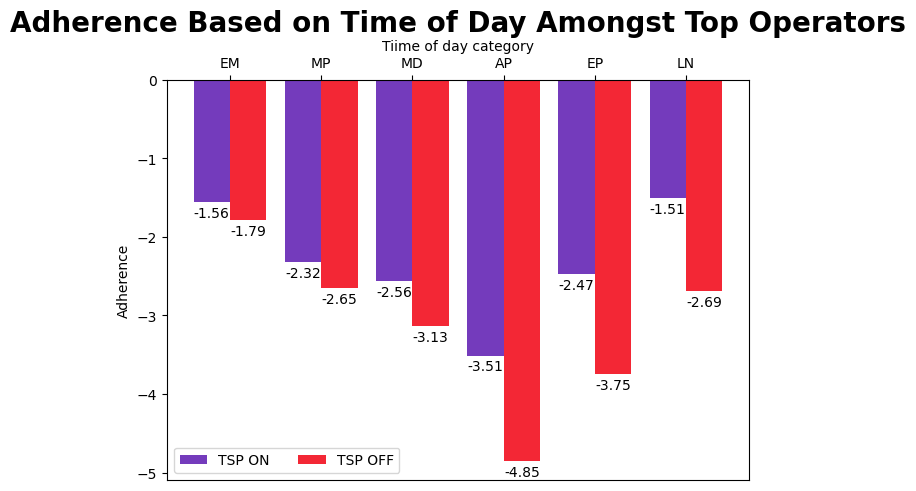

In [447]:
x = np.arange(len(time_buckets))
width = 0.40
multiplier = 0
colors = {'TSP ON' : '#743BBC', 
          'TSP OFF' : '#F32735'}
fig, ax = plt.subplots(layout='constrained')

# plot data in grouped manner of bar type
# bars1 = plt.bar(x-0.2, rounded_list_adherence_time_top, width, label='TSP ON')
# bars2 = plt.bar(x+0.2, rounded_list_adherence_time_top_off, width, label='TSP OFF')

ax.set_ylabel ('Adherence')
ax.set_xlabel ('Tiime of day category')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_title ('Adherence Based on Time of Day Amongst Top Operators', 
              fontweight='bold',
              fontsize=20,
             fontname='Roboto')

ax.set_xticks(x + width/2, time_buckets)
ax.legend(loc='lower left', ncols=3)

for attribute, measurement in adherence_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=colors[attribute])
    ax.bar_label(rects, padding=3)
    multiplier +=1

ax.legend(loc='lower left', ncols=3)